# Machine Learning by Principal Component Analysis 



This notebook accompanies the ECE595 Data analytics course taught at Purdue in Fall 2022. These set of examples pertain to the materials of [lecture 11.](https://github.com/alam740/Data-Analytics-Course/blob/master/Lecture-PDFs/ECE%20595%20-%20Lecture%2011.pdf)

Written by Rohan Sheridan (sherida7@purdue.edu)

In [ ]:
# importing modules
import urllib.request
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
from scipy.linalg import svd
import mpl_toolkits.mplot3d  
from sklearn.decomposition import PCA

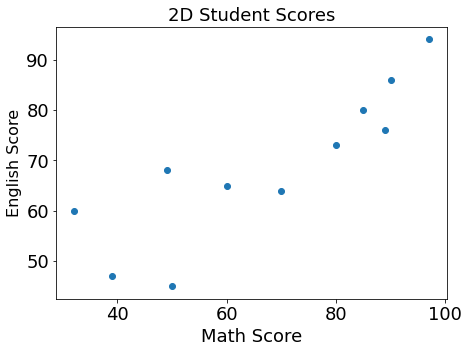

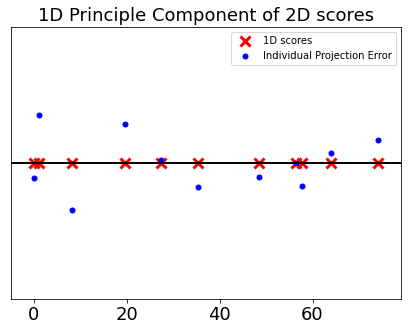

In [ ]:
plt.rc('ytick', labelsize=18)
plt.rc('xtick', labelsize=18)

## Math Scores
s1 = [97,32,89,50,90,70,85,80,60,49,39]

## English Scores
s2 = [94,60,76,45,86,64,80,73,65,68,47]

## Form a np array with the scores
students = np.transpose(np.asarray([s1,s2]))

## Plot math scores vs english scores to visualize data
fig1 = plt.figure(1,figsize=(7, 5))
ax1 = fig1.add_subplot(111)

ax1.set_xlabel('Math Score',fontsize = 16)
ax1.set_ylabel('English Score', fontsize = 16)
ax1.set_title("2D Student Scores",fontsize = 20)  
ax1.scatter(s1,s2)
ax1.axis('tight')
ax1.title.set_fontsize(18)
ax1.xaxis.label.set_fontsize(18)
plt.show()
print("\n\n")

## Create a PCA instance with one principle component
pca = PCA(n_components = 1)

## Fit the PCA instance to student scores
pca.fit(students)

## After fitting PCA instance, transform 2D data to 1D data
students1D = pca.fit_transform(students)

## Perform and inverse transform
## Convert 1D data back to 2D data
students1Dinv = pca.inverse_transform(students1D)

##Offset data so that minimum value = 0
students1D = students1D - min(students1D)

## calculate difference between ground truth and inverse transformed data
## essetnially compares how close each 1D point is to the principle component

an = np.sum((students - students1Dinv),axis=1)
an = np.reshape(an,(len(an),1))

## Plot principle component

plt.figure(2,figsize=(7, 5))
x = np.linspace(min(students1D)-10,max(students1D)+10,10)
plt.scatter(students1D,students1D*0,
            marker='x',c='red',s = 100,linewidth=3)
plt.scatter(students1D,students1D*0 + an,
            s= 25, c='blue')
plt.legend(["1D scores","Individual Projection Error"])
plt.plot(x,x*0,c='black',linewidth=2)
plt.xlim(min(students1D)-5,max(students1D)+5)
plt.ylim(-10,10)
plt.yticks([])
plt.title("1D Principle Component of 2D scores",
          fontsize=18)
plt.show()


#Below is an example of SVD on images

In [ ]:
## Download High-Res photo of Mona Lisa from Wikipedia
## Link can be swaped out so that image of choice can be use for SVD

urllib.request.urlretrieve(
'https://upload.wikimedia.org/wikipedia/commons/b/b1/Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF.jpg',
"image.png")

## Image is saved as a PIL object and converted to grayscale
img = Image.open("image.png").convert("L")

## Oringinal Image is large, so we scale down by a factor of 10
## Larger images means larger matricies which slows down the code...

scale = 1/10    ## Set Scale
x, y = img.size   ## Grab original dimensions
x2, y2 = math.floor(x*scale), math.floor(y*scale)   ## Scale down dims
img = img.resize((x2,y2),Image.ANTIALIAS)   ## Scale down image

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (90305292 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


Original Image Dimensions (width, height):  (7854, 11498) 

Scaled down Image Dimensions : (1149, 785) 




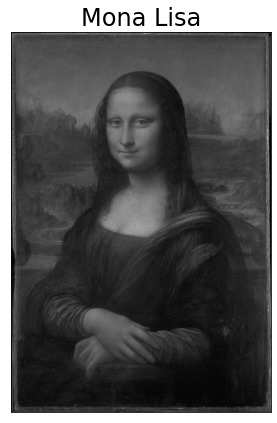

In [ ]:
print('Original Image Dimensions (width, height): ', (x,y),'\n')
print('Scaled down Image Dimensions :', np.shape(img),'\n\n')

## Show the image
plt.figure(3,figsize=(7, 7))
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.xticks([])
plt.yticks([])
plt.title("Mona Lisa",fontsize=24)
plt.show()


In [ ]:
## Convernt Image from PIL object to numpy array
## Unable to work directly with PIL object
imgNp = np.array(img)

## preform SVD on image

u,s,v = svd(imgNp)

## Save image array dimensions for reconstruction
shape = np.shape(imgNp)

## Use Dimensions Reduction funciton to display desired
## number of dimensions 
def DimReduce(u,s,v,dims,shape): 

  ##  Create blank array to store reduced img
  AR = np.zeros(shape)
  
  if dims>min(shape): dims = min(shape)

  for i  in range(dims):

    ## transform the ith column of u into a column vector
    U = np.resize(u[:,i],(np.size(u[:,i]),1))
    S = s[i]  ##  Save the ith diagonal of s 
    ## transform the ith row of v into a row vector
    V = np.resize(v[i,:],(1,np.size(v[i,:])))
    US = U*S  ##  Scale U by S

    ## Multiply US by V
    dim = np.dot(US, V)

    ## Add the dimension to the blank array/update image array
    AR = AR + dim

  return AR


## Save three dim. reduced images comprised of
##  5 dims, 15 dims and 50 dims respectivly

NR = 5

AR5 = DimReduce(u,s,v,NR,shape)

NR = 15

AR15 = DimReduce(u,s,v,NR,shape)

NR = 50

AR50 = DimReduce(u,s,v,NR,shape)

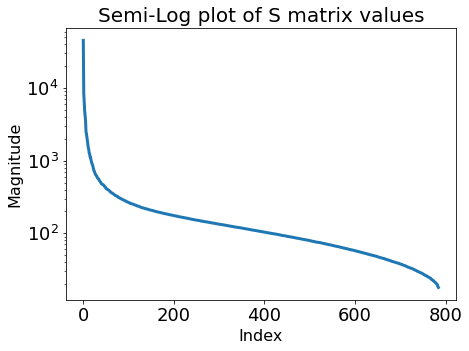

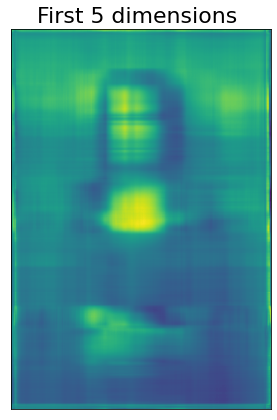

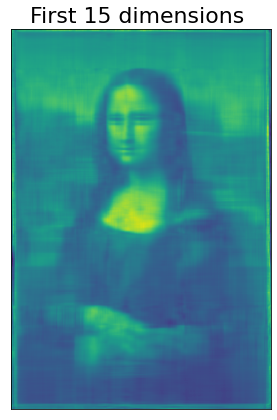

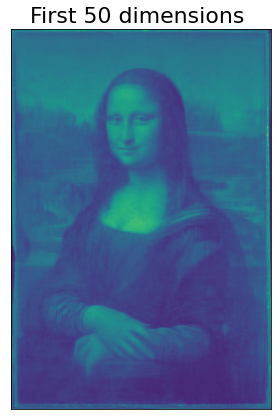

In [ ]:
## Display the diagonals
fig, ax = plt.subplots()
fig.set_size_inches((7,5))
ax.semilogy(s,linewidth = 3)

ax.set_title("Semi-Log plot of S matrix values",fontsize =20)
ax.set_xlabel("Index",fontsize=16)
ax.set_ylabel("Magnitude",fontsize=16)
plt.show()

## Plot the dim reduced images
print('\n\n')
plt.figure(4,figsize=(7, 7))
plt.imshow(AR5)
plt.title("First 5 dimensions ",fontsize=22)
plt.xticks([])
plt.yticks([])
plt.show()
print('\n\n')
plt.figure(5,figsize=(7, 7))
plt.imshow(AR15)
plt.title("First 15 dimensions ",fontsize=22)
plt.xticks([])
plt.yticks([])
plt.show()
print('\n\n')
plt.figure(6,figsize=(7, 7))
plt.imshow(AR50)
plt.title("First 50 dimensions ",fontsize=22)
plt.xticks([])
plt.yticks([])
plt.show()


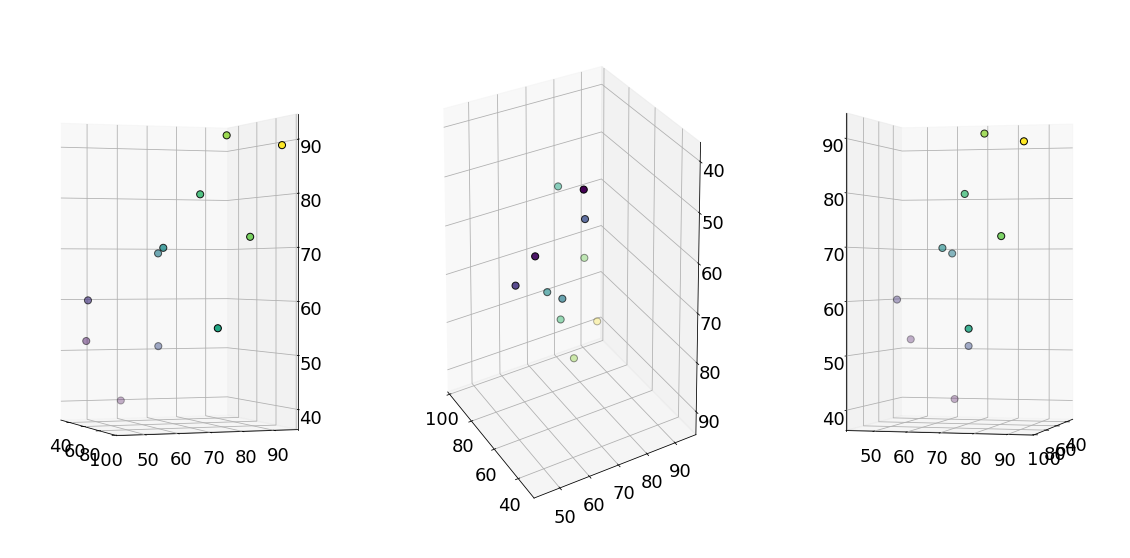

In [ ]:
## Similar Student PCA example
## This one has 3 dimensions 

from matplotlib.figure import projections
s3 = np.transpose(np.asarray([[89,40,55,60,72,70,91,80,69,51,52]]))
students3D = np.append(students,s3,axis =1)

fig = plt.figure(3,figsize=(20, 10))
cs = np.sum(students3D,axis=1)/3

ax3 = fig.add_subplot(131, projection="3d", elev=0, azim=340)
ax3.scatter(
    students3D[:,0],
    students3D[:,1],
    students3D[:,2],
    s = 50,edgecolor='k',c=cs)

ax4 = fig.add_subplot(132, projection="3d", elev=200, azim=30)
ax4.scatter(
    students3D[:,0],
    students3D[:,1],
    students3D[:,2],
    s = 50,edgecolor='k',c=cs)


ax5 = fig.add_subplot(133, projection="3d", elev=0, azim=15)
ax5.scatter(
    students3D[:,0],
    students3D[:,1],
    students3D[:,2],
    s = 50,edgecolor='k',c=cs)


plt.show()

print('\n\n')


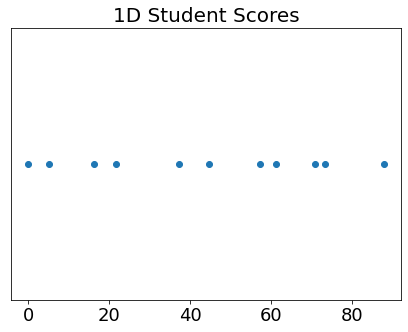

In [ ]:
pca2 = PCA(n_components=1)
pca2.fit(students3D)
students1D = pca2.fit_transform(students3D)


students1Dinv = pca.inverse_transform(students1D)
students1D = students1D - min(students1D)
an = np.sum((students - students1Dinv),axis=1)
an = np.reshape(an,(len(an),1))


fig4 = plt.figure(4,figsize=(7, 5))
ax4 = fig4.add_subplot(111)

ax4.set_title("1D Student Scores",fontsize = 20)
ax4.scatter(students1D[:,0],students1D[:,0]*0)

plt.yticks([])

plt.show()